In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold=np.inf)
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
r_wp = np.logspace(-1, 1.4, 20)
r_wp = (r_wp[:-1]+r_wp[1:])/2.
r_wp

array([  0.11687839,   0.15633276,   0.20910566,   0.27969299,
         0.37410832,   0.50039523,   0.66931252,   0.89525084,
         1.19745866,   1.60168208,   2.1423583 ,   2.86554937,
         3.83286643,   5.12671854,   6.85733338,   9.172148  ,
        12.26836937,  16.40977524,  21.94918617])

In [3]:
all_w = np.load('101617_param_search_Fisher.npz')

In [4]:
all_w.files

['wp_cov', 'wprp', 'ngals', 'param']

In [5]:
ngal = all_w['ngals']
#mask = np.logical_and(ngal<103700,ngal>102000)
param = all_w['param']
wp = all_w['wprp']
wpcov = all_w['wp_cov']
ngal = ngal
param_median = param[0]
param_median

array([  1.02654941,  13.1879107 ,   0.87818971,  12.10313919,
        12.26929428,   0.91596941,   0.02586083])


Out[4]:
array([  1.02654941,  13.1879107 ,   0.87818971,  12.10313919,
        12.26929428,   0.91596941,   0.02586083])

(array([ 2.,  2.,  4.,  3.,  4.,  9.,  6.,  7.,  7.,  6.]),
 array([ 102424. ,  102528.6,  102633.2,  102737.8,  102842.4,  102947. ,
         103051.6,  103156.2,  103260.8,  103365.4,  103470. ]),
 <a list of 10 Patch objects>)

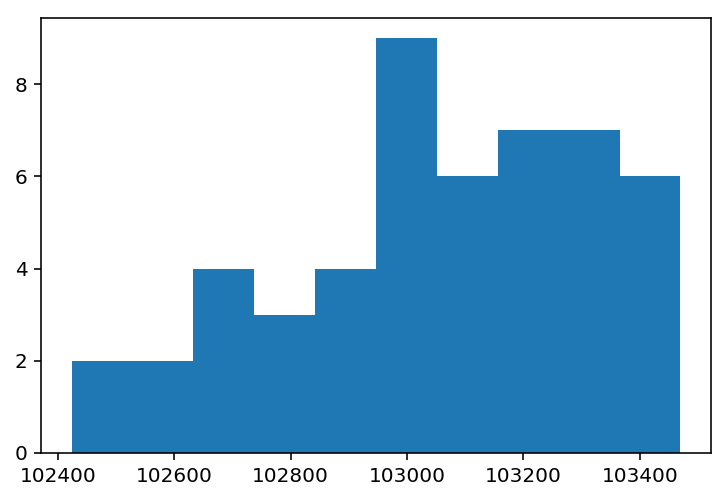

In [7]:
plt.hist(ngal[:50])

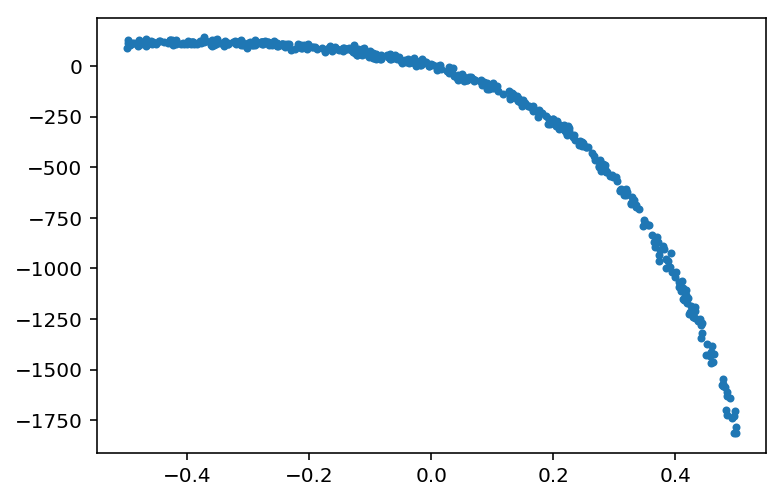

In [36]:
plt.plot(param[50:550,0]-param_median[0],wp[50:550,0]-np.mean(wp[mask_median][:,0],axis=0),'.')
#plt.xlabel(r'$|d\alpha|$')
#plt.ylabel(r'$|d wp(0.11Mpc)|$')

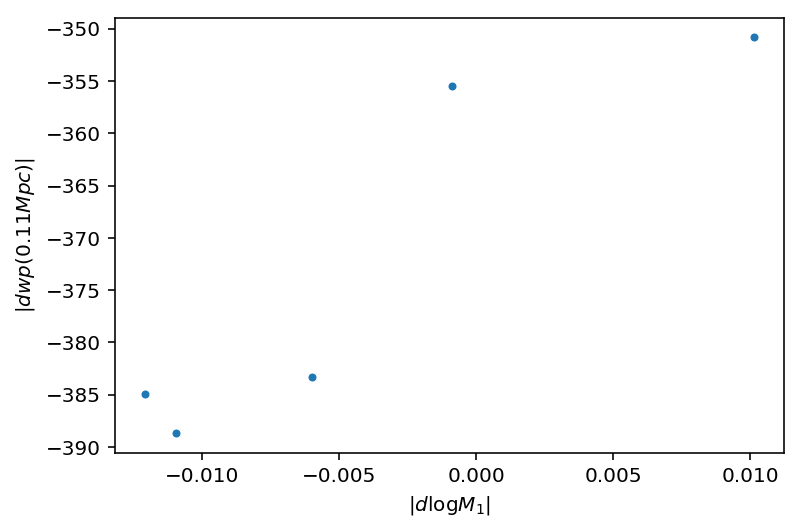

In [10]:
plt.plot(param[195:200,1]-param_median[1],wp[195:200,0]-np.mean(wp[mask_median][0]),'.')
plt.xlabel(r'$|d\logM_1|$')
plt.ylabel(r'$|dwp(0.11Mpc)|$')

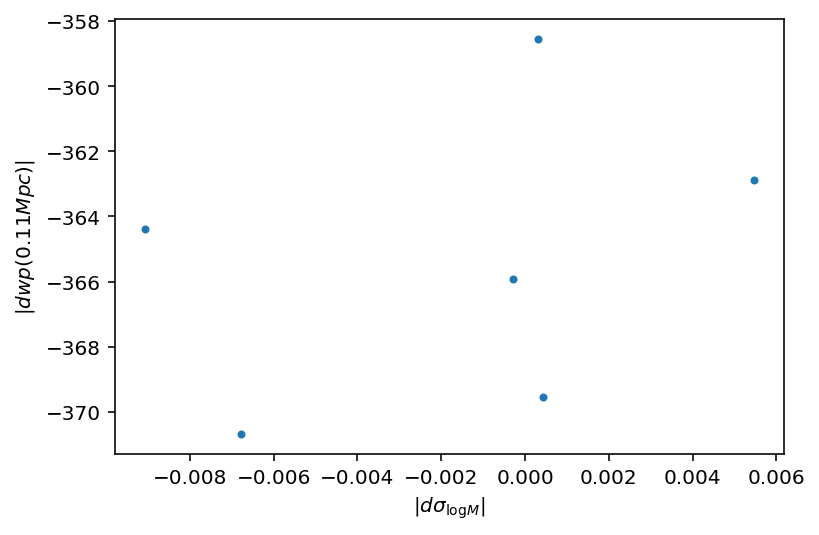

In [11]:
plt.plot(param[200:206,2]-param_median[2],wp[200:206,0]-np.mean(wp[mask_median][0]),'.')
plt.xlabel(r'$|d\sigma_{\logM}|$')
plt.ylabel(r'$|d wp(0.11Mpc)|$')

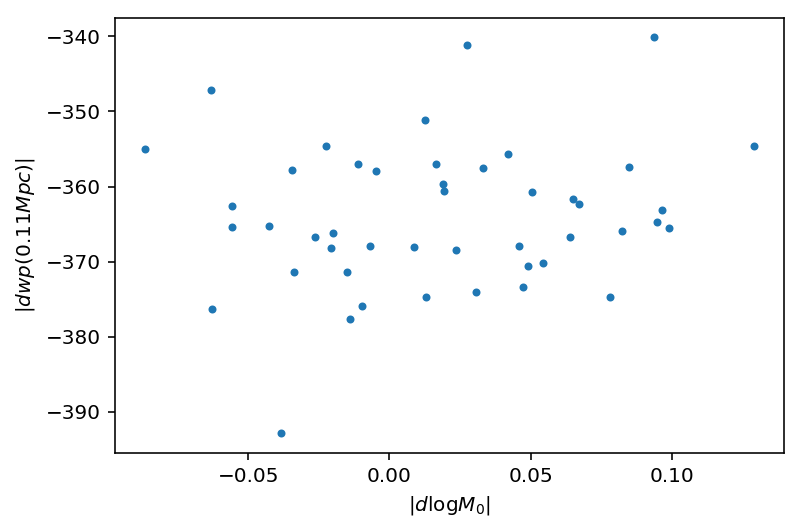

In [12]:
plt.plot(param[206:252,3]-param_median[3],wp[206:252,0]-np.mean(wp[mask_median][0]),'.')
plt.xlabel(r'$|d\logM_0|$')
plt.ylabel(r'$|d wp(0.11Mpc)|$')

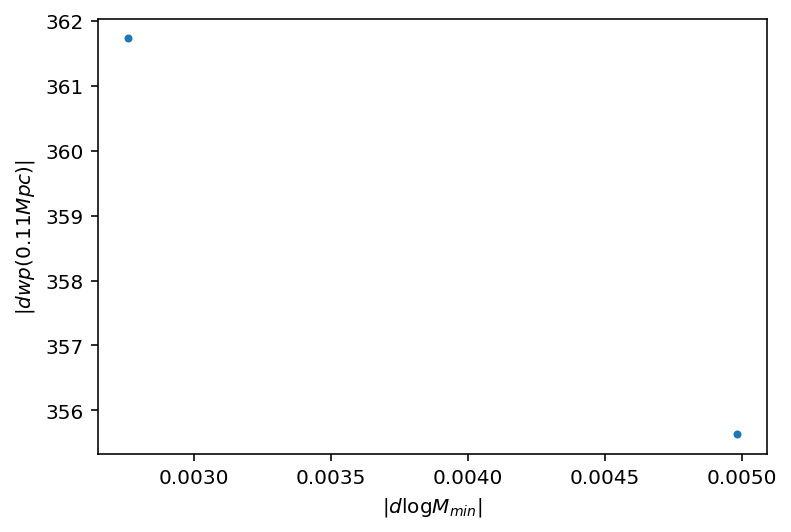

In [125]:
plt.plot(np.abs(param[252:254,4]-param_median[4]),np.abs(wp[252:254,0]-np.mean(wp[mask_median][0])),'.')
plt.xlabel(r'$|d\logM_{min}|$')
plt.ylabel(r'$|d wp(0.11Mpc)|$')

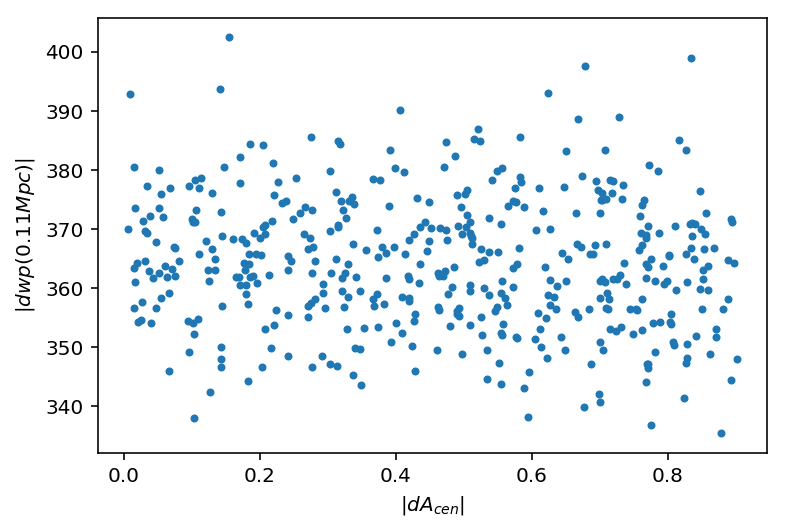

In [126]:
plt.plot(np.abs(param[254:708,5]-param_median[5]),np.abs(wp[254:708,0]-np.mean(wp[mask_median][0])),'.')
plt.xlabel(r'$|dA_{cen}|$')
plt.ylabel(r'$|d wp(0.11Mpc)|$')

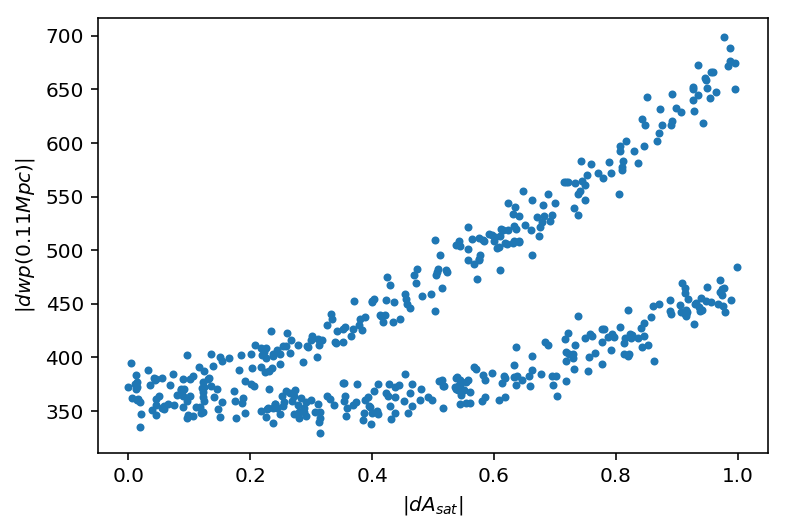

In [128]:
plt.plot(np.abs(param[708:,6]-param_median[6]),np.abs(wp[708:,0]-np.mean(wp[mask_median][0])),'.')
plt.xlabel(r'$|dA_{sat}|$')
plt.ylabel(r'$|d wp(0.11Mpc)|$')

In [21]:
mask_median = np.logical_and(param.T[0]==param_median[0],param.T[1]==param_median[1])
for i in range(5):
    mask_median = np.logical_and(mask_median,param.T[i+2]==param_median[i+2])

In [8]:
covar_real = np.cov(wp[mask_median].T)

covar_cosmic = np.mean(wpcov[mask_median],axis=0)

covar_tot = covar_cosmic+covar_real

In [9]:
def dfdp(i,func=wp):
    d_func = np.mean(func[mask_median],axis=0)-func[i]
    dp = param[i]-param_median
    return d_func/np.sum(dp),np.where(dp!=0)[0][0],np.sum(dp)   ##df/dpi,i,dpi

In [10]:
dfdpi = np.zeros((param.shape[0]-np.sum(mask_median),21))

In [11]:
for i in range(np.sum(mask_median),param.shape[0]):  ##i,dpi,dwp/dpi
    dfdpi[i-np.sum(mask_median),0] = dfdp(i)[1]
    dfdpi[i-np.sum(mask_median),1] = dfdp(i)[2]
    dfdpi[i-np.sum(mask_median),2:] = dfdp(i)[0]

In [22]:
def Fisher(i,j,m,n,func=wp,covar=covar_tot):
    Iij = np.dot(dfdpi[np.where(dfdpi[:,0]==i)][m,2:],np.dot(np.linalg.inv(covar),dfdpi[np.where(dfdpi[:,0]==j)][n,2:]))
    return Iij

In [23]:
def Fmatrix(d_vector):
    fmatrix = np.zeros((7,7))
    dp = np.zeros(7)
    for i in range(7):
        dp[i] = dfdpi[np.where(dfdpi[:,0]==i)][d_vector[i],1]
        for j in range(7):
            fmatrix[i,j] = Fisher(i,j,d_vector[i],d_vector[j])
    return fmatrix,dp

In [26]:
print np.sqrt(np.linalg.inv(Fmatrix([2,2,0,1,0,2,3])[0]).diagonal())
print Fmatrix([2,2,0,1,0,2,3])[1]

[ 0.01814441  0.01257781  0.00339706  0.00296722  0.00499796  0.04609539
  0.09929232]
[ 0.03707745 -0.01095809  0.00545863 -0.00479812  0.00498095 -0.10370198
 -0.14760929]


In [98]:
print np.sqrt(np.linalg.inv(Fmatrix([54,4,4,1,1,67,19])[0]).diagonal())
print Fmatrix([54,4,4,1,1,67,19])[1]

[  2.15637424e-04   7.02350490e-04   1.87749029e-04   2.96218899e-03
   1.66225210e-03   3.05807695e-03   2.08663298e-05]
[ -4.57552336e-04  -8.66271803e-04  -2.96723239e-04  -4.79812436e-03
  -2.75958057e-03  -6.45213526e-03  -4.54854239e-05]


In [91]:
dtype = [('row', int), ('i', int), ('dpi', float)]
values = zip(range(0,len(dfdpi[:,0])),dfdpi[:,0],np.abs(dfdpi[:,1]))[:145]
a0 = np.array(values, dtype=dtype)
print np.sort(a0, order='dpi')

[( 54, 0,   4.57552336e-04) ( 15, 0,   2.92015251e-03)
 (125, 0,   3.58843450e-03) ( 43, 0,   3.95507476e-03)
 ( 12, 0,   8.46235044e-03) (136, 0,   9.32283619e-03)
 ( 88, 0,   1.03320753e-02) ( 50, 0,   1.24316623e-02)
 (113, 0,   1.24398198e-02) (140, 0,   1.29175252e-02)
 ( 26, 0,   1.35932677e-02) ( 64, 0,   1.45050120e-02)
 (130, 0,   1.55069348e-02) ( 52, 0,   1.64683527e-02)
 (110, 0,   1.65895674e-02) ( 83, 0,   1.67336740e-02)
 (128, 0,   1.75815129e-02) ( 30, 0,   2.16717610e-02)
 ( 53, 0,   2.35370377e-02) ( 65, 0,   2.40426989e-02)
 (118, 0,   2.40479005e-02) (114, 0,   2.40510311e-02)
 (141, 0,   2.54940377e-02) ( 57, 0,   2.66221922e-02)
 ( 84, 0,   2.78121577e-02) ( 86, 0,   2.86251424e-02)
 ( 23, 0,   2.88344451e-02) ( 85, 0,   2.89633971e-02)
 (129, 0,   2.98476054e-02) ( 90, 0,   3.08508486e-02)
 ( 66, 0,   3.09319578e-02) ( 96, 0,   3.15484456e-02)
 ( 36, 0,   3.37058211e-02) (127, 0,   3.37771644e-02)
 ( 95, 0,   3.40694755e-02) ( 68, 0,   3.46785799e-02)
 ( 63, 0, 

In [92]:
values = zip(range(-145,len(dfdpi[:,0])-145),dfdpi[:,0],np.abs(dfdpi[:,1]))[145:150]
a1 = np.array(values, dtype=dtype)
print np.sort(a1, order='dpi')

[(4, 1,  0.00086627) (1, 1,  0.0059811 ) (3, 1,  0.01013105)
 (2, 1,  0.01095809) (0, 1,  0.01208358)]


In [93]:
values = zip(range(-150,len(dfdpi[:,0])-150),dfdpi[:,0],np.abs(dfdpi[:,1]))[150:156]
a2 = np.array(values, dtype=dtype)
print np.sort(a2, order='dpi')

[(4, 2,  0.00029672) (5, 2,  0.00031091) (3, 2,  0.00044046)
 (0, 2,  0.00545863) (2, 2,  0.0067776 ) (1, 2,  0.00907155)]


In [94]:
values = zip(range(-156,len(dfdpi[:,0])-156),dfdpi[:,0],np.abs(dfdpi[:,1]))[156:202]
a3 = np.array(values, dtype=dtype)
print np.sort(a3, order='dpi')

[( 1, 3,  0.00479812) (42, 3,  0.00678126) (26, 3,  0.00887153)
 (30, 3,  0.00955643) (17, 3,  0.01125368) ( 5, 3,  0.01247054)
 (37, 3,  0.01279142) (27, 3,  0.01410165) (29, 3,  0.01501916)
 ( 8, 3,  0.01664231) (19, 3,  0.01905467) ( 9, 3,  0.01922181)
 ( 2, 3,  0.01988411) (14, 3,  0.02074329) (18, 3,  0.02239194)
 ( 4, 3,  0.02346475) (40, 3,  0.02631814) (31, 3,  0.02745952)
 ( 3, 3,  0.03070036) (13, 3,  0.0333008 ) (22, 3,  0.03383519)
 (24, 3,  0.03452789) ( 0, 3,  0.0383286 ) (16, 3,  0.04216417)
 (20, 3,  0.04270779) (43, 3,  0.04602736) (28, 3,  0.04740153)
 (41, 3,  0.04906709) (10, 3,  0.05047924) (35, 3,  0.05435385)
 (34, 3,  0.05568752) (21, 3,  0.05572671) (33, 3,  0.06301238)
 (45, 3,  0.06319475) (11, 3,  0.06401643) (23, 3,  0.06496094)
 (15, 3,  0.06707861) (39, 3,  0.07810792) ( 7, 3,  0.08241265)
 (36, 3,  0.08480534) (25, 3,  0.08660293) (38, 3,  0.09367555)
 (12, 3,  0.09487406) (32, 3,  0.0963959 ) ( 6, 3,  0.09916483)
 (44, 3,  0.12904535)]


In [95]:
values = zip(range(-202,len(dfdpi[:,0])-202),dfdpi[:,0],np.abs(dfdpi[:,1]))[202:204]
a4 = np.array(values, dtype=dtype)
print np.sort(a4, order='dpi')

[(1, 4,  0.00275958) (0, 4,  0.00498095)]


In [96]:
values = zip(range(-204,len(dfdpi[:,0])-204),dfdpi[:,0],np.abs(dfdpi[:,1]))[204:658]
a5 = np.array(values, dtype=dtype)
print np.sort(a5, order='dpi')[:236]

[( 67, 5,  0.00645214) (252, 5,  0.00905717) (  7, 5,  0.01480479)
 (129, 5,  0.01544772) (110, 5,  0.01549779) (181, 5,  0.01657032)
 ( 73, 5,  0.01657704) (134, 5,  0.01992722) ( 99, 5,  0.02154545)
 (158, 5,  0.02490417) (195, 5,  0.02652477) (118, 5,  0.02783125)
 ( 48, 5,  0.03150009) (421, 5,  0.03156097) (237, 5,  0.03403054)
 (202, 5,  0.0340418 ) (404, 5,  0.03648059) (303, 5,  0.03798291)
 (419, 5,  0.04062175) (173, 5,  0.04314972) (426, 5,  0.04681251)
 (365, 5,  0.04692063) (141, 5,  0.0513425 ) (245, 5,  0.05152526)
 (376, 5,  0.05231462) (126, 5,  0.05475212) (243, 5,  0.05537378)
 (326, 5,  0.05690876) (318, 5,  0.06064234) (381, 5,  0.06411141)
 (438, 5,  0.06687475) (434, 5,  0.0670925 ) ( 35, 5,  0.06832362)
 (238, 5,  0.07114325) (368, 5,  0.07357097) ( 98, 5,  0.07453734)
 (397, 5,  0.07573982) (342, 5,  0.08075632) (341, 5,  0.09501446)
 (159, 5,  0.09535035) (227, 5,  0.09653514) (154, 5,  0.10014073)
 (293, 5,  0.10103678) (429, 5,  0.10110684) (405, 5,  0.10324

In [97]:
values = zip(range(-658,len(dfdpi[:,0])-658),dfdpi[:,0],np.abs(dfdpi[:,1]))[658:]
a6 = np.array(values, dtype=dtype)
print np.sort(a6, order='dpi')[:-6]

[( 19, 6,   4.54854239e-05) ( 14, 6,   3.69241440e-03)
 (378, 6,   6.42911354e-03) (463, 6,   1.16572723e-02)
 (105, 6,   1.25247853e-02) (204, 6,   1.34130624e-02)
 (447, 6,   1.36186680e-02) (173, 6,   1.40556496e-02)
 (310, 6,   1.42118742e-02) ( 92, 6,   1.60527543e-02)
 (480, 6,   1.90714289e-02) (379, 6,   1.92473662e-02)
 (352, 6,   2.02045964e-02) (376, 6,   3.19420648e-02)
 (112, 6,   3.52212812e-02) (421, 6,   3.92591177e-02)
 (386, 6,   4.25503773e-02) (359, 6,   4.36692669e-02)
 (144, 6,   4.48475717e-02) (195, 6,   4.55190247e-02)
 ( 21, 6,   4.57465702e-02) (340, 6,   4.61676814e-02)
 (179, 6,   5.08446342e-02) (347, 6,   5.47756741e-02)
 (284, 6,   5.50801103e-02) (388, 6,   5.87122288e-02)
 (396, 6,   5.88476973e-02) ( 28, 6,   6.49892860e-02)
 ( 47, 6,   6.84706666e-02) ( 86, 6,   7.33049548e-02)
 ( 41, 6,   7.47432287e-02) (417, 6,   7.94223871e-02)
 (280, 6,   8.59327933e-02) (482, 6,   8.59505996e-02)
 (218, 6,   8.82248732e-02) (372, 6,   8.91577744e-02)
 (226, 6, 